## Monte Carlo Simulation

1a) Compute the price of the following options using Monte Carlo
Simulation with the sample size 250 or larger.

- Asian Call
- Asian Put
- Lookback Call
- Lookback Put
- Floating Lookback Call
- Floating Lookback Put




In [1]:
# known variables
S = 100 # initial price
T = 2/12 # converted to year
K = 105 # strike price 
r = 0.02 # risk-free rate
sigma = 0.25 # volatility

n_simulation = 10000 # minimum sample size of 250
n_step = 8 # unit time is per week. So there are 8 weeks per 2 months


In [2]:
import numpy as np
import pandas as pd
dt = T / n_step 
drift = (r - ((sigma**2)/2)) * dt 
a = sigma*np.sqrt(dt)

np.random.seed(153) # consistent random seed 
z = np.random.normal(0,1,(n_simulation,n_step))

z # x axis is number of steps, y axis is number of simulations
z.shape # 10000 simulations, 8 diff new values


(10000, 8)

Creating stochastic stock price 

In [3]:
simul_stock = np.zeros((n_simulation,n_step+1))   # create empty arrays 
simul_stock[:,0] = S # current price in the beginning of every simulation

for i in range(1,n_step+1):
  simul_stock[:,i] = simul_stock[:,i-1] * np.exp(drift + a * z[:,i-1])

In [4]:
print(simul_stock.shape)
simul_stock[0] # printing example of 1 path

(10000, 9)


array([100.        , 100.32791743,  96.14529095,  93.77521395,
        93.72023543,  98.53252511,  98.44954554,  98.34183755,
        93.05219797])

Histogram for Normal Distribution

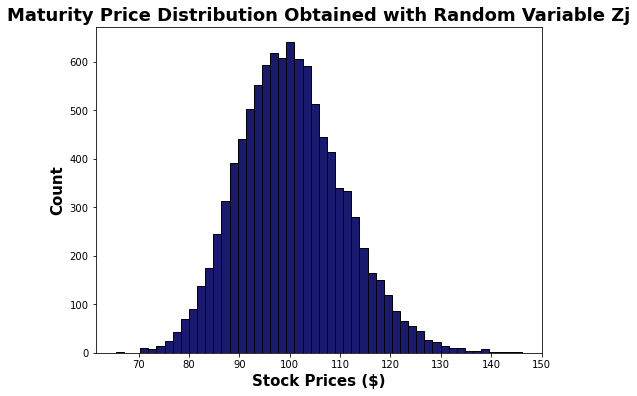

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title('Maturity Price Distribution Obtained with Random Variable Zj', fontsize = 18, fontweight = 'bold')
plt.ylabel('Count',fontsize = 15, fontweight = 'bold')
plt.xlabel('Stock Prices ($)',fontsize = 15, fontweight = 'bold')
plt.hist(simul_stock[:,8],bins=50, color = 'midnightblue', edgecolor = 'black')
plt.show()

Line Chart of Simulated Stock Prices

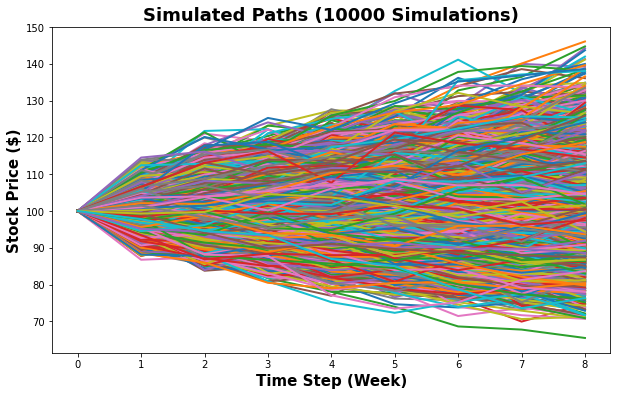

In [6]:
# Line plot for each scenario paths
plt.figure(figsize=(10, 6))
plt.title('Simulated Paths ('+ str(n_simulation) +' Simulations)', fontsize = 18, fontweight = 'bold')
plt.ylabel('Stock Price ($)',fontsize = 15, fontweight = 'bold')
plt.xlabel('Time Step (Week)',fontsize = 15, fontweight = 'bold')
[plt.plot(simul_stock[i,:], linewidth=2) for i in range(n_simulation)]
plt.show()

Payoff Calculation


In [7]:
# calculate option payoffs
# taking the max of payoff. If it's negative, it won't be exercised (value becomes 0)
payoff_asian_call = np.maximum(simul_stock.mean(axis=1) - K, 0) # (mean of stock - K)
payoff_asian_put = np.maximum(K - simul_stock.mean(axis=1), 0) # (K - mean of stock)

payoff_lookback_call = np.maximum(simul_stock.max(axis=1) - K, 0) # (max of stock - K)
payoff_lookback_put = np.maximum(K - simul_stock.min(axis=1), 0) # (K - min of stock)

payoff_fl_lookback_call =  np.maximum(simul_stock[:,-1] - simul_stock.min(axis=1), 0) # (final price - min of stock)
payoff_fl_lookback_put = np.maximum(simul_stock.max(axis=1) - simul_stock[:,-1], 0) # (max of stock - final price)


Discount payoffs to present value

In [8]:
PV_payoff_asian_call = payoff_asian_call * np.exp(-r*T)
PV_payoff_asian_put = payoff_asian_put * np.exp(-r*T)

PV_payoff_lookback_call = payoff_lookback_call * np.exp(-r*T)
PV_payoff_lookback_put = payoff_lookback_put * np.exp(-r*T)

PV_payoff_fl_lookback_call = payoff_fl_lookback_call * np.exp(-r*T)
PV_payoff_fl_lookback_put = payoff_fl_lookback_put * np.exp(-r*T)

Sample Mean

In [9]:
samplemean_payoff_asian_call = np.mean(PV_payoff_asian_call)
samplemean_payoff_asian_put = np.mean(PV_payoff_asian_put)

samplemean_payoff_lookback_call = np.mean(PV_payoff_lookback_call)
samplemean_payoff_lookback_put = np.mean(PV_payoff_lookback_put)

samplemean_payoff_fl_lookback_call = np.mean(PV_payoff_fl_lookback_call)
samplemean_payoff_fl_lookback_put = np.mean(PV_payoff_fl_lookback_put)

Sample Variance

In [10]:
samplevar_payoff_asian_call = np.sum(np.square(PV_payoff_asian_call-np.mean(PV_payoff_asian_call)))/(n_simulation-1)
samplevar_payoff_asian_put = np.sum(np.square(PV_payoff_asian_put-np.mean(PV_payoff_asian_put)))/(n_simulation-1)

samplevar_payoff_lookback_call = np.sum(np.square(PV_payoff_lookback_call-np.mean(PV_payoff_lookback_call)))/(n_simulation-1)
samplevar_payoff_lookback_put = np.sum(np.square(PV_payoff_lookback_put-np.mean(PV_payoff_lookback_put)))/(n_simulation-1)

samplevar_payoff_fl_lookback_call = np.sum(np.square(PV_payoff_fl_lookback_call-np.mean(PV_payoff_fl_lookback_call)))/(n_simulation-1)
samplevar_payoff_fl_lookback_put = np.sum(np.square(PV_payoff_fl_lookback_put-np.mean(PV_payoff_fl_lookback_put)))/(n_simulation-1)

Result

In [11]:
col_1 = ["Asian Call", "Asian Put", "Lookback Call", "Lookback Put", "Floating Lookback Call", "Floating Lookback Put"]

monte_1 = {'Options': col_1, 'price (sample mean)': [samplemean_payoff_asian_call, samplemean_payoff_asian_put, samplemean_payoff_lookback_call, samplemean_payoff_lookback_put,
                                        samplemean_payoff_fl_lookback_call, samplemean_payoff_fl_lookback_put],
           'sample variance': [samplevar_payoff_asian_call, samplevar_payoff_asian_put, samplevar_payoff_lookback_call, samplevar_payoff_lookback_put,
                        samplevar_payoff_fl_lookback_call, samplevar_payoff_fl_lookback_put]}
table_1_a = pd.DataFrame(data = monte_1)
table_1_a['95% confidence interval lower bound'] = table_1_a['price (sample mean)'] - 1.96*np.sqrt(table_1_a['sample variance']/n_simulation)
table_1_a['95% confidence interval upper bound'] = table_1_a['price (sample mean)'] + 1.96*np.sqrt(table_1_a['sample variance']/n_simulation)
table_1_a

,Options,price (sample mean),sample variance,95% confidence interval lower bound,95% confidence interval upper bound
0,Asian Call,0.712330,3.876655,0.673739,0.750921
1,Asian Put,5.538709,21.638668,5.447535,5.629883
2,Lookback Call,3.393235,29.841675,3.286165,3.500305
3,Lookback Put,11.035587,31.800712,10.925058,11.146115
4,Floating Lookback Call,6.361973,44.118722,6.231786,6.492160
5,Floating Lookback Put,6.296680,33.406887,6.183395,6.409965


1 b) Price American Put with Monte Carlo 

In [12]:
#following the binomial tree model (Page11 of American option PDF)
from scipy.stats import norm
tao = np.zeros(n_simulation) #tao be the optimal exercise time step (or stopping time)
for i in range(0,n_simulation):
  for j in range(1,n_step+1):
    
    d1 = (np.log(simul_stock[i,j]/K)+(r + 0.5 * sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))
    d2 = d1 - sigma*np.sqrt(T-j*dt)
    E_ST_St = K*np.exp(-r*(T-j*dt))*norm.cdf(-d2) - simul_stock[i,j]*norm.cdf(-d1)
    excercise_payoff = np.maximum(K - simul_stock[i,j], 0)
    if (excercise_payoff >= E_ST_St) and (tao[i]==0):
      tao[i] = j  

#calculate present value of payoffs from exercise at time tao
PV_payoff_america_put = np.zeros(n_simulation)
for i in range(0,n_simulation):
  PV_payoff_america_put[i] = np.maximum(K - simul_stock[i,tao[i].astype(int)], 0)*np.exp(-r*tao[i]*dt)
    
#average optimal stopping time 
average_stopping_time_american_put = np.mean(tao*dt)
#variance
variance_american_put = np.sum((tao*dt-average_stopping_time_american_put)**2)/(n_simulation-1)
#sample mean
sample_mean_american_put = np.mean(PV_payoff_america_put)
#sample variance
sample_variance_american_put = np.sum((PV_payoff_america_put-sample_mean_american_put)**2)/(n_simulation-1)
#95% confidence interval
lower_bound_american_put = sample_mean_american_put - 1.96*np.sqrt(sample_variance_american_put/n_simulation)
upper_bound_american_put = sample_mean_american_put + 1.96*np.sqrt(sample_variance_american_put/n_simulation)

<ipython-input-12-1edec7e5d6e3>:7: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(simul_stock[i,j]/K)+(r + 0.5 * sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))


In [13]:
table_1_b = pd.DataFrame({'Option': 'American Put', 'Price Sample Mean)': [sample_mean_american_put],
           'Sample Variance': [sample_variance_american_put], '95% Confidence Interval Lower Bound':[lower_bound_american_put], 
           '95% Confidence Interval Upper Bound':[upper_bound_american_put]})
table_1_b

,Option,Price Sample Mean),Sample Variance,95% Confidence Interval Lower Bound,95% Confidence Interval Upper Bound
0,American Put,6.963289,35.595983,6.84635,7.080227


## Lattice Approach

2a) Compute the price of the following options using Monte Carlo
Simulation with the sample size 250 or larger.

- Asian Call
- Asian Put
- Lookback Call
- Lookback Put
- Floating Lookback Call
- Floating Lookback Put

Creating Binomial Tree

In [14]:
from itertools import product
# please check the dt
u = np.exp(sigma*np.sqrt(dt)) # up multiplier
d = 1/u # down multiplier
# q = ((1+r*2/12/8-d)) / (u-d) # risk neutral probability (discrete)
q = (np.exp(r*dt)-d) / (u-d) # risk neutral probability (continuous)

# binomial tree
price_tree = np.zeros([n_step+1, n_step+1])
for i in range(n_step+1):
  for j in range(i+1):
    price_tree[j, i] = S * (d**j)*(u**(i-j))
 
price_tree.shape

# expanding binomial tree into every single path
n = 8
a = np.array(list(product((0, 1), repeat=n)))
a.shape
a = np.c_[[0] * 2 ** n, a]
a = a.cumsum(axis=1)
a.shape
final_price_tree = np.choose(a, price_tree)
final_price_tree 

array([[100.        , 103.67433355, 107.48367436, ..., 124.17309715,
        128.73563091, 133.46580739],
       [100.        , 103.67433355, 107.48367436, ..., 124.17309715,
        128.73563091, 124.17309715],
       [100.        , 103.67433355, 107.48367436, ..., 124.17309715,
        119.77226465, 124.17309715],
       ...,
       [100.        ,  96.45588892,  93.03738507, ...,  80.53274203,
         83.49178359,  80.53274203],
       [100.        ,  96.45588892,  93.03738507, ...,  80.53274203,
         77.6785722 ,  80.53274203],
       [100.        ,  96.45588892,  93.03738507, ...,  80.53274203,
         77.6785722 ,  74.92555731]])

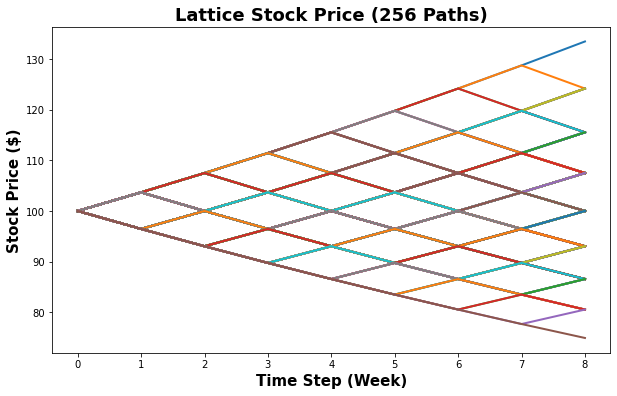

In [15]:
# Line plot for each scenario paths
plt.figure(figsize=(10, 6))
plt.title('Lattice Stock Price ('+ str(2**n_step) +' Paths)', fontsize = 18, fontweight = 'bold')
plt.ylabel('Stock Price ($)',fontsize = 15, fontweight = 'bold')
plt.xlabel('Time Step (Week)',fontsize = 15, fontweight = 'bold')
[plt.plot(final_price_tree[i,:], linewidth=2) for i in range(2**n_step)]
plt.show()

Payoff at Final Stage

In [16]:
#calculate payoffs at final stage
payoff_asian_call_lattice = np.maximum(np.mean(final_price_tree,axis=1)-K, 0)
payoff_asian_put_lattice = np.maximum(K- np.mean(final_price_tree,axis=1), 0)

payoff_lookback_call_lattice = np.maximum(final_price_tree.max(axis=1)-K, 0)
payoff_lookback_put_lattice = np.maximum(K- final_price_tree.min(axis=1), 0)

payoff_fl_lookback_call_lattice = np.maximum(final_price_tree[:,-1] - final_price_tree.min(axis=1), 0)
payoff_fl_lookback_put_lattice = np.maximum(final_price_tree.max(axis=1) - final_price_tree[:,-1], 0)

Function to Calculate Option Price

In [17]:
#setup a function to calculate option price based on given final stage payoffs
def lattice_price(payoff_array):
  stage=np.zeros((9,256))
  stage[8,:] = payoff_array
  for i in [7,6,5,4,3,2,1,0]:
    for j in range(0, 2**i):
      stage[i, j] = (stage[i+1, 2*j]*q+ stage[i+1,(2*j+1)]*(1-q))*np.exp(-r*dt) # / (1+r*2/12/8)
  return(stage[0,0])  

Result

In [18]:
lattice_1 = {'Options': col_1, 'Price ($)': [lattice_price(payoff_asian_call_lattice), lattice_price(payoff_asian_put_lattice), lattice_price(payoff_lookback_call_lattice),
                                                       lattice_price(payoff_lookback_put_lattice), lattice_price(payoff_fl_lookback_call_lattice), lattice_price(payoff_fl_lookback_put_lattice)]}
table_2_a = pd.DataFrame(data = lattice_1)
table_2_a

,Options,Price ($)
0,Asian Call,0.692490
1,Asian Put,5.509542
2,Lookback Call,3.574964
3,Lookback Put,11.248501
4,Floating Lookback Call,6.597918
5,Floating Lookback Put,6.547841


2b) Lattice Approach on American Put Option

In [19]:
decrementing_number = []
for i in range(-1, -1*price_tree.shape[0], -1):
  decrementing_number.append(i)
decrementing_number

[-1, -2, -3, -4, -5, -6, -7, -8]

Last Tree

In [20]:
price_tree

array([[100.        , 103.67433355, 107.48367436, 111.43298307,
        115.52740254, 119.77226465, 124.17309715, 128.73563091,
        133.46580739],
       [  0.        ,  96.45588892, 100.        , 103.67433355,
        107.48367436, 111.43298307, 115.52740254, 119.77226465,
        124.17309715],
       [  0.        ,   0.        ,  93.03738507,  96.45588892,
        100.        , 103.67433355, 107.48367436, 111.43298307,
        115.52740254],
       [  0.        ,   0.        ,   0.        ,  89.74003679,
         93.03738507,  96.45588892, 100.        , 103.67433355,
        107.48367436],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         86.5595502 ,  89.74003679,  93.03738507,  96.45588892,
        100.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  83.49178359,  86.5595502 ,  89.74003679,
         93.03738507],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

In [21]:
# setup empty array
option_tree = price_tree.copy()
option_tree = option_tree * 0

# setup last tree
for j in range(price_tree.shape[0]):
  option_tree[j][-1] = np.maximum(K - price_tree[:,[-1]][j], 0)
# print(option_tree)


for i in decrementing_number: 
  # print(i)
  for k in range(price_tree.shape[0]):
    if k+1 < price_tree.shape[0] and i-1 > (n_step+1)*-1: 
      option_tree[k][i-1] = (option_tree[k][i] * q + option_tree[k+1][i] * (1-q)) * np.exp(-r*dt) # discount can be changed /(1+r*2/12/8)
      if option_tree[k][i-1] >= 0 and (K > price_tree[k][i-1]) and price_tree[k][i-1] != 0:
        # print("condition 1:", option_tree[k][i-1])
        option_tree[k][i-1] = np.maximum( option_tree[k][i-1], (K - price_tree[k][i-1]) ) # strike price
        # print("condition 1 after calc:", option_tree[k][i-1])
      elif option_tree[k][i-1] >= 0 and (K < price_tree[k][i-1]) and price_tree[k][i-1] != 0:
        # print("condition 2:", option_tree[k][i-1])
        option_tree[k][i-1] = option_tree[k][i-1]*1
      else:
        option_tree[k][i-1] = 0
  # print(option_tree)


option_tree[0][0] = (option_tree[0][1] * q + option_tree[1][1] * (1-q)) * np.exp(-r*dt) # discount can be changed /(1+r*2/12/8)

if K != S:
  if option_tree[0][0] >= 0 and (K > price_tree[0][0]) and price_tree[0][0] != 0: 
    option_tree[0][0] = np.maximum( option_tree[0][0], (K - price_tree[0][0]) ) # strike price
  elif option_tree[0][0] >= 0 and (K > price_tree[0][0]) and price_tree[0][0] != 0: 
    option_tree[0][0] = option_tree[0][0]*1
  else:
    option_tree[0][0] = 0


# print("---------------------")
print("Payoff Tree")
print(option_tree)
print("American Put Option Price(Lattice):", option_tree[0][0]) # <<< american put price

Payoff Tree
[[ 7.03216596  4.63139447  2.64202316  1.18300115  0.32016202  0.
   0.          0.          0.        ]
 [ 0.          9.40778412  6.59893256  4.08440751  2.03568685  0.63645816
   0.          0.          0.        ]
 [ 0.          0.         12.18818427  9.08647776  6.11007618  3.41854727
   1.26523124  0.          0.        ]
 [ 0.          0.          0.         15.25996321 12.03199996  8.77193655
   5.54691032  2.51518512  0.        ]
 [ 0.          0.          0.          0.         18.4404498  15.25996321
  11.96261493  8.54411108  5.        ]
 [ 0.          0.          0.          0.          0.         21.50821641
  18.4404498  15.25996321 11.96261493]
 [ 0.          0.          0.          0.          0.          0.
  24.46725797 21.50821641 18.4404498 ]
 [ 0.          0.          0.          0.          0.          0.
   0.         27.3214278  24.46725797]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.         30.07444269]]
Am

Result

In [22]:
table_2_b = pd.DataFrame({'Option': 'American Put', 'Price ($)': [option_tree[0][0]]})
table_2_b

,Option,Price ($)
0,American Put,7.032166
